# Chapter 6: Causal Structure Learning from Data

In the previous lessons, we saw that causal inference aims to answer questions involving cause and effect. Specifically, we saw how Directed Acyclic Graphs (DAGs) could be used to incorporate our prior knowledge domain and effectively visualize the causal relationships in a clear-cut way.

DAGs represent causal structure by showing relationship between causes and effects. A DAG is a special kind of graph where all edges are directed (information flow is in one direction) and no cycles exist (information that leaves a vertex cannot return to it). The vertices (nodes) in a causal DAG represent variables, and edges (arrows) represent causation, where a variable is directly caused by its parents.

However, often in the real world, we do not know which variable causes the other. 

**But how can we create a DAG?**
- Sometimes, we have prior knowledge, and we can use it to build a causal model
- Other times, we have limited knowledge and we want to estimate/retrieve the causal model from some data we have 

**With structure learning, we want to determine the structure of the graph that best captures the causal dependencies between the variables in the data set.** 
In other words, given a dataset, we derive a causal model that describes it.


## How can we estimate the causal structure from a dataset?

Unfortunately, there is no standard recipe for that, and that's why causal inference is generally challenging. 
Causal discovery is an example of an inverse problem. 
However, there are some techniques available, and here we are going to sketch the most common ones and key ideas.
The usual approach to solving inverse problems is to **make assumptions** about what you are trying to uncover. This narrows down the possible solutions and hopefully makes the problem solvable. 

There are four common assumptions made across causal discovery algorithms. A nice discussion of these assumptions can be found in Kalainathan et al (2018) https://arxiv.org/abs/1803.04929

- **Acyclicity** — causal structure can be represented by a DAG $G$ (mentioned in [Chapter 3](/lectures/CH-3-Graphical-Causal-Models.ipynb))
- **Markov Property** — all nodes are independent of their non-descendants when conditioned on their parents (mentioned in [Chapter 3](/lectures/CH-3-Graphical-Causal-Models.ipynb))
- **Faithfulness** — all conditional independences in true underlying distribution $p$ are represented in $G$ 
- **Sufficiency** — any pair of nodes in $G$ has no common external cause

Although these assumptions help narrow down the number of possible causal models, they do not guarantee to build causal models. This is where a few tricks for causal discovery are helpful. A taxonomy of algorithms based on the following tricks is given in the table below.

| **TRICK**                             | **ALGORITHM**                                               |
|-----------------------------------|---------------------------------------------------------|
| **Conditional Independence Testing**  | PC <br> Fast Causal Inference (FCI) <br>  Inductive Causation (IC) |
| **Greedy Search on DAG Space**        | Gready Equivalent Search (GES) <br>  Gready Interventional Equivalent Search (GIES) <br> Concave penalized Coordinate Descent with reparametrization (CCDr)                                                        |
| **Exploiting Asymmetry**              | Linear Non-Gaussian Acyclic Model (LINGAM) <br>  Nonlinear Additive Noise Models <br> Post_nonlinear Causal Model (PNL) <br> Granger Causality                                                      |
| **Hybrid**                            | Structural Agnostic Modeling (SAM) <br> Causal Additive Modeling (CAM) <br> Causal Generative Causal Neural Network (CGNN)                                                       |


A comprehensive review of different causal structure search methods is available at:
[Review of Causal Discovery Methods Based on Graphical Models](https://www.frontiersin.org/articles/10.3389/fgene.2019.00524/full#:~:text=Causal%20discovery%20aims%20to%20find,process%20or%20the%20sampling%20process)

### Trick 1: Conditional Independence Testing

One of these earliest causal discovery algorithms is the PC algorithm named after its authors Peter Spirtes and Clark Glymour. This algorithm (and others like it) use the idea that two statistically independent variables are not causally linked. The PC algorithm is illustrative of this first trick. An outline of the algorithm is given in the figure below (image taken from https://towardsdatascience.com/causal-discovery-6858f9af6dcb). 

![img](img/ch6/Trick1.png)

The first step is to form a fully connected, undirected graph using every variable in the dataset. Next, edges are deleted if the corresponding variables are independent. Then, connected edges undergo conditional independence testing e.g. independence test of bottom and far right node conditioned on middle node in the figure above (step 2).

If conditioning on a variable kills the dependence, that variable is added to the Separation set for those two variables. Depending on the size of the graph, conditional independence testing will continue (i.e. condition on more variables) until there are no more candidates for testing.

Next, colliders (i.e. $X \rightarrow Y \leftarrow Z$) are oriented based on the Separation set of node pairs. Finally, remaining edges are directed based on 2 constraints, 1) no new v-structures and 2) no directed cycles can be formed.


### Trick 2: Greedy Search of Graph Space

A greedy algorithm is an approach for solving a problem by selecting the best option available at the moment. It doesn't worry whether the current best result will bring the overall optimal result.
The algorithm never reverses the earlier decision even if the choice is wrong. It works in a top-down approach.

Usually, greedy algorithms are easier to describe and can perform quite good compared to other algorithms.
However, greedy searches cannot guarantee an optimal solution. Neverthless, for most problems the space of possible DAGs is so big that finding a true optimal solution is intractable.

The Greedy Equivalence Search (GES) algorithm uses this trick. GES starts with an empty graph and iteratively adds directed edges such that the improvement in a model fitness measure (i.e. score) is maximized.

### Trick 3: Exploiting Asymmetries

As we say, fundamental property of causality is asymmetry. $A$ could cause $B$, but $B$ may not cause $A$. Thus, there are algorithms that leverage this idea to select between causal model candidates, usuallty with respect to time, complexity, and functional.

- Time asymmetry is quite natural. It’s the idea that causes happen before effects. This is expoited for example in the Granger causality test. We say that a variable $X$ that evolves over time Granger-causes another evolving variable $Y$ if predictions of the value of $Y$ based on its own past values and on the past values of $X$ are better than predictions of $Y$ based only on $Y$'s own past values.

- Complexity asymmetry follows the Occam’s razor principle, that simpler models are better. In other words, if you have handful of candidate models to choose from, this idea says to pick the simplest one. One way of quantifying simplicity (or complexity) is the Kolmogorov Complexity.

- Functional asymmetry assumes models that better fit a relationship are better candidates. For example, given two variables $X$ and $Y$, the nonlinear additive noise model (NANM) performs a nonlinear regression between $X$ and $Y$ , e.g. $y = f(x) + n$, where $n$ = noise/residual, in both directions. The model (i.e. causation) is then accepted if the potential cause (e.g. $x$) is independent of the noise term (e.g. $n$).

### Trick 4: Hybrid Approaches

The last part includes algorithms which differ one fron the other and exploit different assumtpions. For example, Causal Generative Neural Networks (CGNN) try to learn functional
causal models from observational data based on generative neural networks.  This area is pretty new and interested readers can find more techincal information in: 
[CGNN](https://arxiv.org/pdf/1711.08936.pdf)

## A practical exercise in Python: Shortness of breath disease

We will make use of the *bnlearn* library, which is built on top of the extensive *pgmpy* library. *pgmpy* is a pure python implementation for Bayesian Networks with various algorithms for Structure Learning, Parameter Estimation, Approximate (Sampling Based) and Exact inference, and Causal Inference.

In this section we will try to analyse patients treatment regarding shortness-of-breath (dyspnoea). The data set is small (few variables) and synthetic from Lauritzen and Spiegelhalter (1988), and is about lung diseases (tuberculosis, lung cancer or bronchitis) and visits to infection areas.

*Lauritzen S, Spiegelhalter D (1988). Local Computation with Probabilities on Graphical Structures and their Application to Expert Systems (with discussion). Journal of the Royal Statistical Society*  [link](https://www.jstor.org/stable/2345762?seq=1)

**Background:** Shortness-of-breath (*dyspnoea*) may be due to tuberculosis (*tub*), *lung cancer* or *bronchitis*, or none of them, or more than one of them (*either*). A recent visit to infectious areas (*tub_area*) increases the chances of tuberculosis, while smoking (*smoke*) is known to be a risk factor for both lung cancer and bronchitis. The results of a single chest X-ray (*xray*) do not discriminate between lung cancer and tuberculosis, as neither does the presence or absence of dyspnoea.

In [2]:
# Load model
import bnlearn as bn
df = bn.load(filepath='data/smoke_dataset.pkl')
df

c:\Users\miche\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\miche\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\miche\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


[pypickle] Pickle file loaded: [c:\Users\miche\Dropbox\PhD\Courses\Causality\causality-course\lectures\data\smoke_dataset.pkl]


,tub_area,tub,smoke,lung,bronc,either,xray,dysp
0,1,1,1,1,1,1,1,1
1,1,1,0,0,1,0,0,0
2,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
19995,1,1,0,1,1,1,1,1
19996,1,1,1,1,1,1,0,1
19997,1,1,0,0,0,0,0,0
19998,1,1,0,1,1,1,1,1


### Use prior knowledge to assume a causal model and make inference 

As we saw in the lectures, expert knowledge can be included in bayesian models by using graphs in the form of a Directed Acyclic Graphs. 
Let's assume that our knowledge about dyspnoea is limited to: smoking is related to lung cancer, smoking is related to bronchitis, and if you have lung or bronchitus we may need an xray examination. Therefore, we create a DAG based on this knowledge:

[bnlearn] >bayes DAG created.


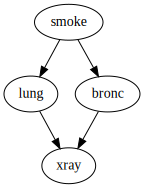

In [5]:
import graphviz as gr

edges = [('smoke', 'lung'),
         ('smoke', 'bronc'),
         ('lung', 'xray'),
         ('bronc', 'xray')]

# Create the DAG from the edges
DAG = bn.make_DAG(edges)

# Plot and make sure the arrows are correct.
def plot_from_edges(edges):
    # plot
    g = gr.Digraph()
    
    for i in range(0, len(edges)):
        g.edge(*edges[i])
    return g

g = plot_from_edges(edges)
g

At this point we have the data set in our dataframe (df), and we have the DAG based on our expert knowledge. 
We can use parameter learning to learn more about conditional probability distributions (CPDs). 

In [7]:
# Learn the parameters from data set.
# As input we have the DAG without CPDs.
DAG = bn.parameter_learning.fit(DAG, df, methodtype='bayes')

[bnlearn] >Removing columns from dataframe to make consistent with DAG [['tub_area' 'tub' 'either' 'dysp']]
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >CPD of smoke:
+----------+----------+
| smoke(0) | 0.495333 |
+----------+----------+
| smoke(1) | 0.504667 |
+----------+----------+
[bnlearn] >CPD of lung:
+---------+---------------------+---------------------+
| smoke   | smoke(0)            | smoke(1)            |
+---------+---------------------+---------------------+
| lung(0) | 0.11449721207460103 | 0.03302509907529723 |
+---------+---------------------+---------------------+
| lung(1) | 0.8855027879253989  | 0.9669749009247027  |
+---------+---------------------+---------------------+
[bnlearn] >CPD of bronc:
+----------+--------------------+--------------------+
| smoke    | smoke(0)           | smoke(1)           |
+----------+--------------------+--------------------+
| bronc(0) | 0.5919054028071524 | 0.3110020758633704 |
+----------+--------

In [8]:
# Print the CPDs
bn.print_CPD(DAG)
# At this point we have a DAG with the learned CPDs

CPD of smoke:
+----------+----------+
| smoke(0) | 0.495333 |
+----------+----------+
| smoke(1) | 0.504667 |
+----------+----------+
CPD of lung:
+---------+---------------------+---------------------+
| smoke   | smoke(0)            | smoke(1)            |
+---------+---------------------+---------------------+
| lung(0) | 0.11449721207460103 | 0.03302509907529723 |
+---------+---------------------+---------------------+
| lung(1) | 0.8855027879253989  | 0.9669749009247027  |
+---------+---------------------+---------------------+
CPD of bronc:
+----------+--------------------+--------------------+
| smoke    | smoke(0)           | smoke(1)           |
+----------+--------------------+--------------------+
| bronc(0) | 0.5919054028071524 | 0.3110020758633704 |
+----------+--------------------+--------------------+
| bronc(1) | 0.4080945971928475 | 0.6889979241366295 |
+----------+--------------------+--------------------+
CPD of xray:
+---------+---------------------+-----+----------

When you are at this part, you combined your expert knowledge with a data set! Now we can make inferences which allows to ask questions to the model. Let me demonstrate a few questions.

</br>

- **Question 1:**
What is the probability of lung-cancer, given that we know that patient does smoke?

In [4]:
q1 = bn.inference.fit(DAG, variables=['lung'], evidence={'smoke':1})

[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+----+--------+-----------+
|    |   lung |         p |
+====+========+===========+
|  0 |      0 | 0.0330251 |
+----+--------+-----------+
|  1 |      1 | 0.966975  |
+----+--------+-----------+


</br>

**Question 2:**
What is the probability of bronchitis, given that we know that patient does smoke?

In [5]:
q2 = bn.inference.fit(DAG, variables=['bronc'], evidence={'smoke':1})

[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+----+---------+----------+
|    |   bronc |        p |
+====+=========+==========+
|  0 |       0 | 0.311002 |
+----+---------+----------+
|  1 |       1 | 0.688998 |
+----+---------+----------+


</br>

**Question 3:**
Lets add more information to our inference. What is the probability of lung-cancer, given that we know that patient does smoke and also has bronchitis?

In [6]:
q3 = bn.inference.fit(DAG, variables=['lung'], evidence={'smoke':1, 'bronc':1})

[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+----+--------+-----------+
|    |   lung |         p |
+====+========+===========+
|  0 |      0 | 0.0330251 |
+----+--------+-----------+
|  1 |      1 | 0.966975  |
+----+--------+-----------+


</br>

**Question 4:**
Lets specify the question even more. What is the probability of lung-cancer or bronchitis, given that we know that patient does smoke but did not had xray?

In [7]:
q4 = bn.inference.fit(DAG, variables=['bronc','lung'], evidence={'smoke':1, 'xray':0})

[bnlearn] >Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+----+---------+--------+-----------+
|    |   bronc |   lung |         p |
+====+=========+========+===========+
|  0 |       0 |      0 | 0.0915345 |
+----+---------+--------+-----------+
|  1 |       0 |      1 | 0.226912  |
+----+---------+--------+-----------+
|  2 |       1 |      0 | 0.194173  |
+----+---------+--------+-----------+
|  3 |       1 |      1 | 0.487381  |
+----+---------+--------+-----------+


## Build a causal model when you have data and no domain knowledge

Suppose that we have the medical records of hundreds or even thousands patients treatment regarding shortness-of-breath (dyspnoea). Our goal is to determine the causality across variables given the data set.
We use structure learning to estimate the DAG structure of the dataset.

In [9]:
df = bn.load(filepath='data/smoke_dataset.pkl')
# Structure learning on the data set
model_estimated = bn.structure_learning.fit(df, methodtype='cs', scoretype='bic')


[pypickle] Pickle file loaded: [c:\Users\miche\Dropbox\PhD\Courses\Causality\causality-course\lectures\data\smoke_dataset.pkl]
[bnlearn] >Computing best DAG using [cs]


Working for n conditional variables: 5: 100%|██████████| 5/5 [00:00<00:00,  6.95it/s]


Lets plot the learned DAG and examine the structure!

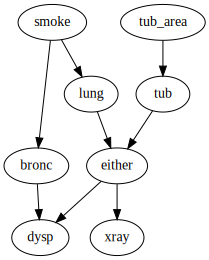

In [13]:
def plot_from_model(model):
    # plot
    g = gr.Digraph()
    
    for i in range(0, len(model_estimated['model_edges'])):
        g.edge(*model_estimated['model_edges'][i])
    return g

# Plot the DAG
plot_from_model(model_estimated)

## References

[Review of Causal Discovery Methods Based on Graphical Models](https://www.frontiersin.org/articles/10.3389/fgene.2019.00524/full)